# MNIST CNN Project

In [1]:
import tensorflow as tf

# **CNN OVERVIEW**
You have an input and you know in last in every Architecture of Alexnet CNN at the end what they do is ther increase the number of feature maps decrease the number of dimension and once that has been done they flatten the whole thing out and once it has been flatten they form dense layer across it and the reason why after flattening it out we directly do not go for an output of 10 neuron .the reason of 10 because we use MNIST dataset here .

MNIST-> [0-9] Values have .

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

from keras import utils

import keras
from keras.datasets import mnist

CV2 -> Open CV Sequential Model -> You have one layer which followed by another layer which is followed by a third layer and so on. -> So, We are importing Sequence kind of models so the model that will be creating a sequential model the layers are one after the other .

-> In Layers we importing - Dense , Dropout , Activation, Faltten

Dense Layer -> So, Dense layer are basically use to create fully connected layer .

Dropout Layer -> In dropout basically means thining out of the value this is used to prevent overfitting .

Activation - To add Activation Function.

Flatten -> You have to all the dimension and finally to get the classification part the convolution are used to get the feature and use those feature as input fully connected dense models that gives you the output .

From Keras.layers import Conv2D , Maxpooling2D

So , this 2 layers are Conv2d and Maxpooling 2D are basically layers that we will be using to adding to our already dense models.

" We have a Dense Layer then we have 2 More layer we will using we are adding Conv2D and Maxpooling 2D this 2 layers we will using "

From Keras.utils import Utils

utils is basically use to plot the models

-> np.utils -> this is basically we will be using it to converting to categorical value to numberto categorical.

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
y_train[0]

5

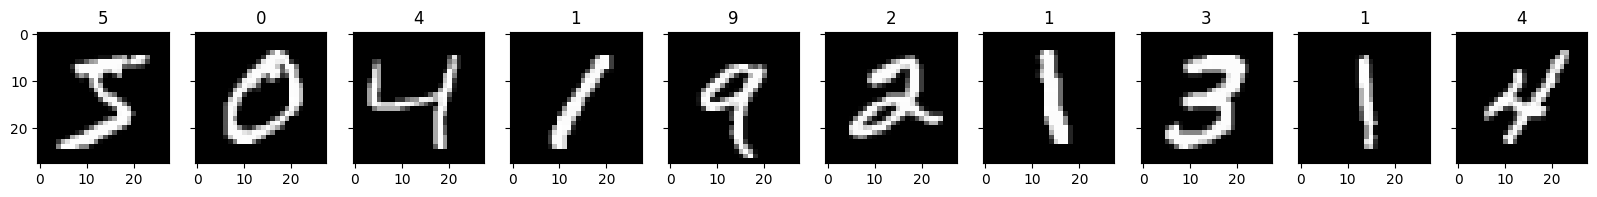

In [5]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show()


set_visible(False) -> We will not able to see axis values the whole grid thing not be able to see

In [6]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1) #1 is for how much channel we use

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]


1st Line Code -> We converting integer value to float value . why we are dong is . So it becomes easier when you are convoluting whole thing if your input and output are some datatype .

x_train /=55 -> if the color lie between [0-255] .

0-> Black

1-> White

then we will dividing the whole thing with 255 and 0 will still remain zero . and it will represent black only . the 255 is converted to 1 abd this now will be weight so that means instead of [0-255] are value lies between [0-1]

0-255/255 dividing the thing is to normalize it .

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
Categorical -> Y_train[0]

categorical value = 5 -> [0,0,0,0,0,1,0,0,0,0]



In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


conv2d -> The first parameter in conv2d is .

-> The number of filters we will be using in this image

-> We use 32 filters

-> (3,3) Kernel Size , Since all the filter we are using this (3 X 3 ) Size

Activation -> 'Relu' activation means is after convolution.

-> First we have the multiplication of the value and those value are finally added up .

-> this is basically what linear model can look like .

-> So to add non linearity always need to add an activation fucntion

-> We dont have worried about the relu causing the problem of gradient explosion and vanishing gradient problem because we just have one convolution layer and our model is very small .

Kernel Initializer -> So, Weight Initializer was basically when you have all weights in MLP . So we had wx+b , b is bias .
= E wx+b

W -> The weight we will be using when we firstly start the model build the model will randomly initialize the weights

Weights can be come from normal distribution

So , In this time this weights are basically kernels this time . So , instead of one weight we have kernel value and this kernel value they will come from He_uniform.

Conv2D -> So, You place the kernel in image then you shift in right direction to get the value . at the same time you also shifted in downward direction to get value . So since the kernel is shifted in two direction so , we have convolution 2D
(max pooling 2D((2,2))->
-> maxpooling is also 3D Because of same reason the kernel is moving in 2 different direction .

Activation-> Softmax -> Why SoftMax -> Softmax what it does is it convert random values to probablities so if you want the probablities of this particular image belonging to class 0 to get the probablity we use softmax .
0.56,0.7,0.12,0.25,0.4,,0.3,0.2,0.1,0.6,0.4 -> we cannot change the output .. if we sum this we get 1 (Not this , this is a random number )This type of output we get.

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=2,validation_data=(x_test,y_test))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - accuracy: 0.8564 - loss: 0.4561 - val_accuracy: 0.9777 - val_loss: 0.0691
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 18ms/step - accuracy: 0.9635 - loss: 0.1226 - val_accuracy: 0.9814 - val_loss: 0.0557


In [13]:
model.save('mnist_cnn_model.h5')

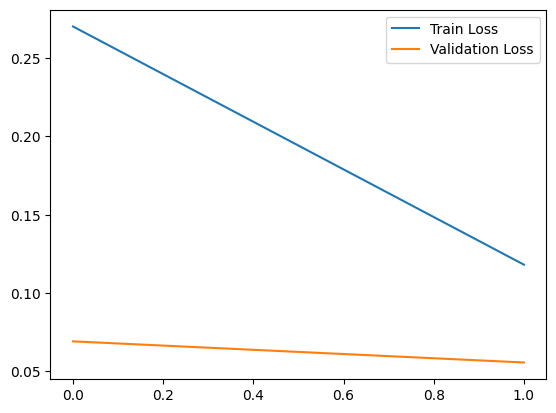

In [14]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

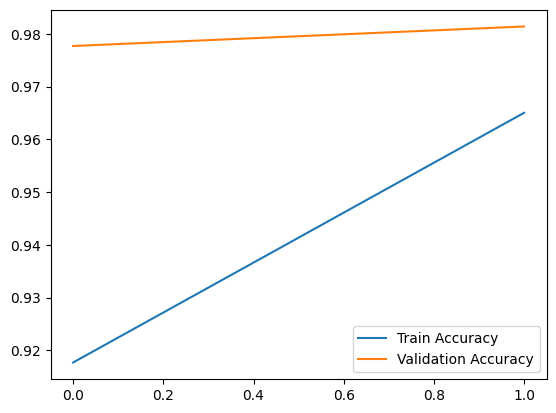

In [15]:
plt.plot(model.history.history['accuracy'],label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

In [16]:
model=keras.models.load_model('mnist_cnn_model.h5')

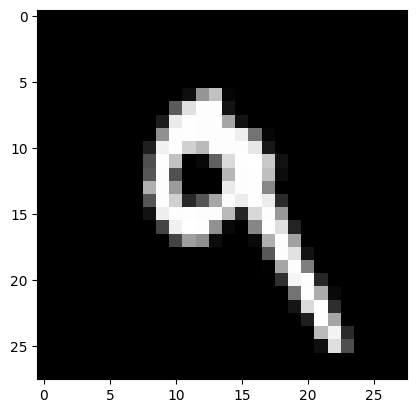

In [17]:
plt.imshow(x_test[7],cmap='gray')

In [18]:
x=np.reshape(x_test[7],(1,28,28,1))
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


9